# Exemple d'arbre de décision simple avec Scikit Learn

Nous cherchons ici à créer un arbre de classification des survivants/morts du naufrage du Titanic
avec les variables Sex et Pclass

http://scikit-learn.org/stable/modules/tree.html#tree

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix
import graphviz # pour les graphiques

## Données

In [2]:
# Chargement des données
data = pd.read_csv("arbre_simple.csv")

print("data:\n", data.head(), "\n")
print("types des variables de train:\n", data.dtypes, "\n")

data:
    Survived     Sex  Pclass
0         1  Female       1
1         1  Female       1
2         1  Female       1
3         1  Female       1
4         1  Female       1 

types des variables de train:
 Survived     int64
Sex         object
Pclass       int64
dtype: object 



### Création des jeux de données

In [3]:
# Création des jeux de données
features = ["Pclass", "Sex"]
target = ["Survived"]

train_features = data[features]
train_target = data[target]

# Conversion des modalités de Sex en valeurs numériques
modalites = {"Sex": {"Female": 1, "Male": 2}}
train_features = train_features.replace(modalites, inplace=False)

print("train_features:\n", train_features.head(), "\n")
print("train_target:\n", train_target.head(), "\n")

train_features:
    Pclass  Sex
0       1    1
1       1    1
2       1    1
3       1    1
4       1    1 

train_target:
    Survived
0         1
1         1
2         1
3         1
4         1 



## Arbre de décision

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [4]:
# Arbre de décision pour une profondeur 'max_depth'
model = tree.DecisionTreeClassifier(max_depth=10, random_state=123)
model = model.fit(train_features, train_target)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')


### Graphe de l'arbre de décision

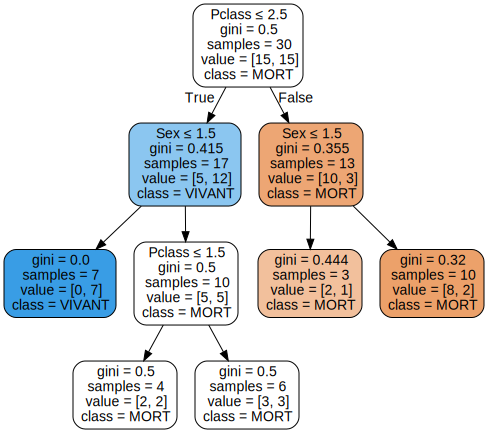

In [5]:
# Graphe de l'arbre de décision pour une profondeur 'max_depth'
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=train_features.dtypes.index,  
                         class_names=["MORT", "VIVANT"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 